<a href="https://colab.research.google.com/github/nile649/CUDA_Tutorials/blob/master/cuda_chp_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3 | 2
## Getting Started with PyCUDA


---
We will start
by learning how to use PyCUDA for some basic and fundamental operations. We will first
see how to query our GPU—that is, we will start by writing a small Python program that
will tell us what the characteristics of our GPU are, such as the core count, architecture, and
memory. We will then spend some time getting acquainted with how to transfer memory
between Python and the GPU with PyCUDA's gpuarray class and how to use this class for
basic computations. The remainder of this chapter will be spent showing how to write some
basic functions (which we will refer to as CUDA Kernels) that we can directly launch onto
the GPU.

The learning outcomes for this chapter are as follows:
1. Determining GPU characteristics, such as memory capacity or core count, using
PyCUDA
2. Understanding the difference between host (CPU) and device (GPU) memory
and how to use PyCUDA's gpuarray class to transfer data between the host and
device
3. How to do basic calculations using only gpuarray objects
4. How to perform basic element-wise operations on the GPU with the
PyCUDA ElementwiseKernel function
5. Understanding the functional programming concept of reduce/scan operations
and how to make a basic reduction or scan CUDA kernel








In [2]:
!lscpu


Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               85
Model name:          Intel(R) Xeon(R) CPU @ 2.00GHz
Stepping:            3
CPU MHz:             2000.162
BogoMIPS:            4000.32
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            1024K
L3 cache:            39424K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_si

Check free memory : !free -g

In [3]:
!free -g

              total        used        free      shared  buff/cache   available
Mem:             12           0          10           0           1          11
Swap:             0           0           0


Check GPu card

In [4]:
!nvidia-smi

Sat Oct 17 20:34:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Querying your GPU

# Installing PyCUDA (Linux)


---
!pip install PyCUDA



In [5]:
!pip install PyCUDA

     |████████████████████████████████| 1.6MB 8.4MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
  Created wheel for PyCUDA: filename=pycuda-2020.1-cp36-cp36m-linux_x86_64.whl size=621391 sha256=9710f974d0c3a8ef8f8a25f2feaadf348f9ecde15b271f043c1ce00361552115
  Stored in directory: /root/.cache/pip/wheels/8f/78/d1/5bb826f81d9d490297a348d818ff3ee6dd6f2075b06dde6ea0
  Created wheel for pytools: filename=pytools-2020.4.2-py2.py3-none-any.whl size=61375 sha256=2820558f1aed4d4ee74866ddc9d3b3558f9d46e69051578f5115318c480fe93e
  Stored in directory: /root/.cache/pip/wheels/9b/d2/2e/fe5677f02563b086529f2422c3fbbf61ee9712249518e9e71e
Successfully built PyCUDA pytools


In [6]:
!sudo apt update
!sudo add-apt-repository ppa:graphics-drivers
!sudo apt-key adv --fetch-keys  http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!sudo bash -c 'echo "deb http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64 /" > /etc/apt/sources.list.d/cuda.list'
!sudo bash -c 'echo "deb http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64 /" > /etc/apt/sources.list.d/cuda_learn.list'

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,681 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main amd64 Packages [860 kB]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Rele

In [7]:
!sudo apt install cuda-10-1
!sudo apt install libcudnn7


Reading package lists... Done
Building dependency tree       
Reading state information... Done
cuda-10-1 is already the newest version (10.1.243-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
W: Target Packages (Packages) is configured multiple times in /etc/apt/sources.list.d/cuda_learn.list:1 and /etc/apt/sources.list.d/nvidia-ml.list:1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libcudnn7-dev
The following held packages will be changed:
  libcudnn7
The following packages will be upgraded:
  libcudnn7 libcudnn7-dev
2 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
W: Target Packages (Packages) is configured multiple times in /etc/apt/sources.list.d/cuda_learn.list:1 and /etc/apt/sources.list.d/nvidia-ml.list:1
E: Held packages were changed and -y was used without --allow-change-held-packages.


code to check GPU specification

# Using PyCUDA's ElementWiseKernel for performing pointwise computations


---
We use the term kernel quite a bit in this text; by kernel, we always mean a function that is
launched directly onto the GPU by CUDA. We will use several functions from PyCUDA
that generate templates and design patterns for different types of kernels, easing our
transition into GPU programming.

---






In [17]:
import numpy as np
import pycuda.autoinit as ai
from pycuda import gpuarray
import timeit
from pycuda.elementwise import ElementwiseKernel

'''
ElementwiseKernel::

class pycuda.elementwise.ElementwiseKernel(arguments, operation, name='kernel', keep=False, options=[], preamble='')

Generate a kernel that takes a number of scalar or vector arguments and performs the scalar operation on each entry of its arguments, if that argument is a vector.

arguments is specified as a string formatted as a C argument list. operation is specified as a C assignment statement, without a semicolon. Vectors in operation should be indexed by the variable i.

name specifies the name as which the kernel is compiled, keep and options are passed unmodified to pycuda.compiler.SourceModule.

preamble specifies some source code that is included before the elementwise kernel specification. You may use this to include other files and/or define functions that are used by operation.

__call__(*args, range=None, slice=None)
Invoke the generated scalar kernel. The arguments may either be scalars or GPUArray instances.

If range is given, it must be a slice object and specifies the range of indices i for which the operation is carried out.

If slice is given, it must be a slice object and specifies the range of indices i for which the operation is carried out, truncated to the container. Also, slice may contain negative indices to index relative to the end of the array.

If stream is given, it must be a pycuda.driver.Stream object, where the execution will be serialized.

'''


"\nElementwiseKernel::\n\nclass pycuda.elementwise.ElementwiseKernel(arguments, operation, name='kernel', keep=False, options=[], preamble='')\n\nGenerate a kernel that takes a number of scalar or vector arguments and performs the scalar operation on each entry of its arguments, if that argument is a vector.\n\narguments is specified as a string formatted as a C argument list. operation is specified as a C assignment statement, without a semicolon. Vectors in operation should be indexed by the variable i.\n\nname specifies the name as which the kernel is compiled, keep and options are passed unmodified to pycuda.compiler.SourceModule.\n\npreamble specifies some source code that is included before the elementwise kernel specification. You may use this to include other files and/or define functions that are used by operation.\n\n__call__(*args, range=None, slice=None)\nInvoke the generated scalar kernel. The arguments may either be scalars or GPUArray instances.\n\nIf range is given, it 

In [20]:
host_data = np.float32(np.random.randn(50000000))
gpu_2x_eln_ker = ElementwiseKernel("float *in, float *out", "out[i] = 2*in[i];","gpu_2x_eln_ker")

'''
Note that PyCUDA automatically sets up the integer index i for us. When we use i as our
index, ElementwiseKernel will automatically parallelize our calculation over i among
the many cores in our GPU.


'''

'\nNote that PyCUDA automatically sets up the integer index i for us. When we use i as our\nindex, ElementwiseKernel will automatically parallelize our calculation over i among\nthe many cores in our GPU.\n\n\n'

In [40]:
def speedcomparison():
  tic = timeit.default_timer()
  host_data_2x = 2*host_data
  toc = timeit.default_timer()
  print("Total time for numpy scalar multiplication {}".format(toc-tic))
  # tic = timeit.default_timer()
  device_data_2x = gpuarray.to_gpu(host_data)
  device_data_2x_res = gpuarray.empty_like(device_data_2x)
  tic = timeit.default_timer()

  ###########********************************************************************************
  gpu_2x_eln_ker(device_data_2x,device_data_2x_res)
  ###########********************************************************************************
  toc = timeit.default_timer()
  device_data_2x_res_host = device_data_2x_res.get()
  # toc = timeit.default_timer()
  print("Total time for GPU scalar multiplication {}".format(toc-tic))
  print('Is the host computation the same as the GPU computation? :\
  {}'.format(np.allclose(host_data_2x, device_data_2x_res_host) ))

In [36]:
speedcomparison()

Total time for numpy scalar multiplication 0.03906610499961971
Total time for GPU scalar multiplication 7.882699992478592e-05
Is the host computation the same as the GPU computation? :  True


**Now, let's cover something else important before we move on, which is very subtle. The
little kernel function we defined operates on C float pointers; this means that we will have
to allocate some empty memory on the GPU that is pointed to by the out variable.**

---
*ElementwiseKernel("float *in, float *out", "out[i] = 2*in[i];","gpu_2x_eln_ker")

*2nd_arg = gpuarray.empty_like(device_data_2x)
gpu_2x_eln_ker(1st_arg,2nd_arg)*



# When you allocate memory on the GPU with the PyCUDA functions gpuarray.empty or gpuarray.empty_like, you do not have to deallocate this memory later due to the destructor of the gpuarray object managing all memory clean up.

In [39]:
2*2

4

In [83]:
import numpy as np
import pycuda.autoinit as ai
from pycuda import gpuarray
from pycuda.elementwise import ElementwiseKernel
import timeit
import matplotlib.pyplot as plt

In [84]:
mandel_ker = ElementwiseKernel(
"pycuda::complex<float> *lattice, float *mandelbrot_graph, int max_iters, float upper_bound",
"""
mandelbrot_graph[i] = 1;
pycuda::complex<float> c = lattice[i]; 
pycuda::complex<float> z(0,0);
for (int j = 0; j < max_iters; j++)
    {
    
     z = z*z + c;
     
     if(abs(z) > upper_bound)
         {
          mandelbrot_graph[i] = 0;
          break;
         }
    }
         
""",
"mandel_ker")



def gpu_mandelbrot(width, height, real_low, real_high, imag_low, imag_high, max_iters, upper_bound):
  real_vals = np.matrix(np.linspace(real_low, real_high, width), dtype=np.complex64)
  imag_vals = np.matrix(np.linspace( imag_high, imag_low, height), dtype=np.complex64) * 1j
  mandelbrot_lattice = np.array(real_vals + imag_vals.transpose(),
dtype=np.complex64)
  # copy complex lattice to the GPU
  mandelbrot_lattice_gpu = gpuarray.to_gpu(mandelbrot_lattice)
  # allocate an empty array on the GPU
  mandelbrot_graph_gpu = gpuarray.empty(shape=mandelbrot_lattice.shape,
  dtype=np.float32)
  mandel_ker( mandelbrot_lattice_gpu, mandelbrot_graph_gpu, np.int32(max_iters), np.float32(upper_bound))
  mandelbrot_graph = mandelbrot_graph_gpu.get()
    
  return mandelbrot_graph


It took 0.09711440799947013 seconds to calculate the Mandelbrot graph.
It took 0.14270888200007903 seconds to dump the image.


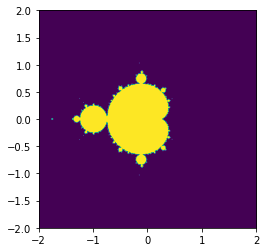

In [85]:
t1 = timeit.default_timer()
mandel = gpu_mandelbrot(512,512,-2,2,-2,2,256, 2)
t2 = timeit.default_timer()
mandel_time = t2 - t1

t1 = timeit.default_timer()
fig = plt.figure(1)
plt.imshow(mandel, extent=(-2, 2, -2, 2))
plt.savefig('mandelbrot.png', dpi=fig.dpi)
t2 = timeit.default_timer()

dump_time = t2 - t1
print( 'It took {} seconds to calculate the Mandelbrot graph.'.format(mandel_time))
print('It took {} seconds to dump the image.'.format(dump_time))



---
In the pervious code we create matrix instead on nxn, which is divided among cuda threads across SM. In each SM core, addition operation is performed in parallel before serailizing over the single loop i.e to find Z.


---



# A brief foray into functional programming


---
Before we continue, let's briefly do a review of two functions available in Python for
functional programming—
1.   map
2.   reduce


---
We see that map acts as ElementwiseKernel! This is actually a standard design pattern in
functional programming. Now, let's look at reduce; rather than taking in a list and
outputting a directly corresponding list, reduce takes in a list, performs a recursive binary
operation on it, and outputs a singleton. Let's get a notion of this design pattern by typing
reduce(lambda x, y : x + y, [1,2,3,4]). When we type this in IPython, we will
see that this will output a single number, 10, which is indeed the sum of 1+2+3+4. You can
try replacing the summation above with multiplication, and seeing that this indeed works
for recursively multiplying a long list of numbers together. Generally speaking, we use
reduce operations with associative binary operations; this means that, no matter the order we
perform our operation between sequential elements of the list, will always invariably give
the same result, provided that the list is kept in order. (This is not to be confused with the
commutative property.)




In [86]:
# Example : Lambda func : Used to define single line function.
pow = lambda x: x**2

In [88]:
pow(2),pow(22),pow(12)

(4, 484, 144)

In [94]:
# Example : Map func : Takes 2 input : a) function b) *args
[x for x in map(lambda x: x**2,[2,3,4,5])]

[4, 9, 16, 25]

In [107]:
# Example : Map func : Takes 2 input : a) function b) *args
import functools

# map(functools.partial(add, y=2), a)
[x for x in map(lambda x,y: x**2+y,[2,3,0,1],[3,0,4,5])]

[7, 9, 4, 6]

In [111]:
# Example : List func : 
from functools import reduce
'''
Working : 

At first step, first two elements of sequence are picked and the result is obtained.
Next step is to apply the same function to the previously attained result and the number just succeeding the second element and the result is again stored.
This process continues till no more elements are left in the container.
The final returned result is returned and printed on console.
1+2 = 3 |1,2|
9+3 = 12|3,3|
144+4 = 148 |12,4|
'''
reduce(lambda x, y : x**2 + y, [1,2,3,4])

148

# Parallel scan and reduction kernel basics


---
Let's look at a basic function in PyCUDA that reproduces the functionality of
reduce—InclusiveScanKernel. (You can find the code under the
simple_scankernal0.py filename.) Let's execute a basic example that sums a small list of
numbers on the GPU:


In [115]:
## Example 1
import numpy as np
import pycuda.autoinit
from pycuda import gpuarray
from pycuda.scan import InclusiveScanKernel
seq = np.array([1,2,3,4],dtype=np.int32)
seq_gpu = gpuarray.to_gpu(seq)
sum_gpu = InclusiveScanKernel(np.int32, "a+b")
print(sum_gpu(seq_gpu).get())
print(np.cumsum(seq))

[ 1  3  6 10]
[ 1  3  6 10]


In [118]:
## Example 2
import numpy as np
import pycuda.autoinit
from pycuda import gpuarray
from pycuda.scan import InclusiveScanKernel
seq = np.array([1,100,-3,-10000, 4, 10000, 66, 14, 21],dtype=np.int32)
seq_gpu = gpuarray.to_gpu(seq)
max_gpu = InclusiveScanKernel(np.int32, "a > b ? a : b")
print(max_gpu(seq_gpu).get())
print(np.max(seq))

[    1   100   100   100   100 10000 10000 10000 10000]
10000


Now, let's finally look one more PyCUDA function for generating GPU
kernels—ReductionKernel. Effectively, **ReductionKernel** acts like a
ElementwiseKernel function followed by a parallel scan kernel. What algorithm is a good
candidate for implementing with a ReductionKernel? The first that tends to come to
mind is the dot product from linear algebra. Let's remember computing the dot product of
two vectors has two steps:
1. Multiply the vectors pointwise
2. Sum the resulting pointwise multiples

These two steps are also called multiply and accumulate. Let's set up a kernel to do this
computation now:

## READ
---


dot_prod = ReductionKernel(np.float32, neutral="0", reduce_expr="a+b",
map_expr="vec1[i]*vec2[i]", arguments="float *vec1, float *vec2")


---
## END
First, note the datatype we use for our kernel (a float32). We then set up the input
arguments to our CUDA C kernel with arguments, (here two float arrays representing
each vector designated with float *) and set the pointwise calculation with map_expr,
here it is pointwise multiplication. As with ElementwiseKernel, this is indexed over i.
We set up reduce_expr the same as with InclusiveScanKernel. This will take the
resulting output from the element-wise operation and perform a reduce-type operation on
the array. Finally, we set the neutral element with neutral. This is an element that will act as
an identity for reduce_expr; here, we set neutral=0, because 0 is always the identity
under addition (under multiplication, one is the identity). We'll see why exactly we have to
set this up when we cover parallel prefix in greater depth later in this book.